In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import gradio as gr


In [2]:
data=pd.read_csv("weatherAUS_rainfall_prediction.csv")
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2010-04-30,Adelaide,10.8,21.2,0.0,1.80,6.60,ENE,22.0,ENE,...,66.0,48.0,1028.4,1024.7,4.45,4.51,15.7,21.0,No,No
1,2014-07-22,Adelaide,3.7,19.0,0.0,1.40,7.61,N,24.0,N,...,75.0,32.0,1024.2,1021.1,4.45,4.51,9.6,18.5,No,No
2,2014-07-23,Adelaide,9.6,15.8,0.0,2.60,7.61,NE,52.0,NNE,...,35.0,51.0,1017.9,1011.5,4.45,4.51,14.7,15.4,No,Yes
3,2014-07-24,Adelaide,10.1,15.5,16.6,0.80,7.61,NNE,50.0,NW,...,96.0,80.0,1007.4,1008.0,4.45,4.51,11.2,14.0,Yes,Yes
4,2014-07-25,Adelaide,11.2,16.2,1.8,0.60,7.61,NW,30.0,WNW,...,89.0,70.0,1018.4,1019.2,4.45,4.51,13.0,15.3,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2012-01-14,Woomera,16.8,31.9,0.0,27.00,7.61,SSE,44.0,SE,...,51.0,17.0,1017.3,1014.2,0.00,4.51,20.2,29.5,No,No
145456,2012-01-15,Woomera,17.0,33.5,0.0,12.40,12.70,SSE,43.0,ESE,...,38.0,12.0,1015.2,1011.8,0.00,0.00,22.2,32.0,No,No
145457,2012-01-16,Woomera,18.9,38.8,0.0,12.00,12.40,N,41.0,ENE,...,10.0,5.0,1012.0,1008.7,0.00,0.00,27.6,37.9,No,No
145458,2012-01-18,Woomera,23.5,38.3,0.0,18.20,13.00,SSE,50.0,SSE,...,54.0,22.0,1013.2,1011.3,1.00,1.00,25.1,35.4,No,No


In [3]:
data.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2010-04-30,Adelaide,10.8,21.2,0.0,1.8,6.60,ENE,22.0,ENE,...,66.0,48.0,1028.4,1024.7,4.45,4.51,15.7,21.0,No,No
1,2014-07-22,Adelaide,3.7,19.0,0.0,1.4,7.61,N,24.0,N,...,75.0,32.0,1024.2,1021.1,4.45,4.51,9.6,18.5,No,No
2,2014-07-23,Adelaide,9.6,15.8,0.0,2.6,7.61,NE,52.0,NNE,...,35.0,51.0,1017.9,1011.5,4.45,4.51,14.7,15.4,No,Yes
3,2014-07-24,Adelaide,10.1,15.5,16.6,0.8,7.61,NNE,50.0,NW,...,96.0,80.0,1007.4,1008.0,4.45,4.51,11.2,14.0,Yes,Yes
4,2014-07-25,Adelaide,11.2,16.2,1.8,0.6,7.61,NW,30.0,WNW,...,89.0,70.0,1018.4,1019.2,4.45,4.51,13.0,15.3,Yes,Yes


In [4]:
data.tail(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2012-01-14,Woomera,16.8,31.9,0.0,27.00,7.61,SSE,44.0,SE,...,51.0,17.0,1017.3,1014.2,0.0,4.51,20.2,29.5,No,No
145456,2012-01-15,Woomera,17.0,33.5,0.0,12.40,12.70,SSE,43.0,ESE,...,38.0,12.0,1015.2,1011.8,0.0,0.00,22.2,32.0,No,No
145457,2012-01-16,Woomera,18.9,38.8,0.0,12.00,12.40,N,41.0,ENE,...,10.0,5.0,1012.0,1008.7,0.0,0.00,27.6,37.9,No,No
145458,2012-01-18,Woomera,23.5,38.3,0.0,18.20,13.00,SSE,50.0,SSE,...,54.0,22.0,1013.2,1011.3,1.0,1.00,25.1,35.4,No,No
145459,2017-01-10,Woomera,21.7,34.5,0.0,5.47,7.61,SE,37.0,SSE,...,71.0,36.0,1010.5,1008.8,6.0,2.00,24.0,33.5,No,No


In [5]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.193993,23.221337,2.360898,5.468995,7.610612,40.035567,14.043384,18.662601,68.880816,51.539143,1017.649946,1015.256314,4.448437,4.509959,16.990624,21.683306
std,6.365750,7.088124,8.382488,3.161541,2.729486,13.118253,8.861059,8.716581,18.854765,20.471189,6.728467,6.663973,2.265605,2.092954,6.449221,6.850057
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.700000,18.000000,0.000000,4.000000,7.610000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,3.000000,4.000000,12.300000,16.700000
50%,12.100000,22.700000,0.000000,5.470000,7.610000,39.000000,13.000000,18.660000,69.000000,51.540000,1017.650000,1015.260000,4.450000,4.510000,16.800000,21.400000
75%,16.800000,28.200000,1.000000,5.470000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [6]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [7]:
data.shape

(145460, 23)

In [8]:
data.dropna()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2010-04-30,Adelaide,10.8,21.2,0.0,1.80,6.60,ENE,22.0,ENE,...,66.0,48.0,1028.4,1024.7,4.45,4.51,15.7,21.0,No,No
1,2014-07-22,Adelaide,3.7,19.0,0.0,1.40,7.61,N,24.0,N,...,75.0,32.0,1024.2,1021.1,4.45,4.51,9.6,18.5,No,No
2,2014-07-23,Adelaide,9.6,15.8,0.0,2.60,7.61,NE,52.0,NNE,...,35.0,51.0,1017.9,1011.5,4.45,4.51,14.7,15.4,No,Yes
3,2014-07-24,Adelaide,10.1,15.5,16.6,0.80,7.61,NNE,50.0,NW,...,96.0,80.0,1007.4,1008.0,4.45,4.51,11.2,14.0,Yes,Yes
4,2014-07-25,Adelaide,11.2,16.2,1.8,0.60,7.61,NW,30.0,WNW,...,89.0,70.0,1018.4,1019.2,4.45,4.51,13.0,15.3,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2012-01-14,Woomera,16.8,31.9,0.0,27.00,7.61,SSE,44.0,SE,...,51.0,17.0,1017.3,1014.2,0.00,4.51,20.2,29.5,No,No
145456,2012-01-15,Woomera,17.0,33.5,0.0,12.40,12.70,SSE,43.0,ESE,...,38.0,12.0,1015.2,1011.8,0.00,0.00,22.2,32.0,No,No
145457,2012-01-16,Woomera,18.9,38.8,0.0,12.00,12.40,N,41.0,ENE,...,10.0,5.0,1012.0,1008.7,0.00,0.00,27.6,37.9,No,No
145458,2012-01-18,Woomera,23.5,38.3,0.0,18.20,13.00,SSE,50.0,SSE,...,54.0,22.0,1013.2,1011.3,1.00,1.00,25.1,35.4,No,No


In [9]:
data.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [10]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
145455    False
145456    False
145457    False
145458    False
145459    False
Length: 145460, dtype: bool

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  object 
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  object 
 10  WindDir3pm     145460 non-null  object 
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

In [12]:
#drop unwanted columns if present
data.drop([ "Unnamed: 0"],axis=1,inplace=True,errors='ignore')
data


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2010-04-30,Adelaide,10.8,21.2,0.0,1.80,6.60,ENE,22.0,ENE,...,66.0,48.0,1028.4,1024.7,4.45,4.51,15.7,21.0,No,No
1,2014-07-22,Adelaide,3.7,19.0,0.0,1.40,7.61,N,24.0,N,...,75.0,32.0,1024.2,1021.1,4.45,4.51,9.6,18.5,No,No
2,2014-07-23,Adelaide,9.6,15.8,0.0,2.60,7.61,NE,52.0,NNE,...,35.0,51.0,1017.9,1011.5,4.45,4.51,14.7,15.4,No,Yes
3,2014-07-24,Adelaide,10.1,15.5,16.6,0.80,7.61,NNE,50.0,NW,...,96.0,80.0,1007.4,1008.0,4.45,4.51,11.2,14.0,Yes,Yes
4,2014-07-25,Adelaide,11.2,16.2,1.8,0.60,7.61,NW,30.0,WNW,...,89.0,70.0,1018.4,1019.2,4.45,4.51,13.0,15.3,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2012-01-14,Woomera,16.8,31.9,0.0,27.00,7.61,SSE,44.0,SE,...,51.0,17.0,1017.3,1014.2,0.00,4.51,20.2,29.5,No,No
145456,2012-01-15,Woomera,17.0,33.5,0.0,12.40,12.70,SSE,43.0,ESE,...,38.0,12.0,1015.2,1011.8,0.00,0.00,22.2,32.0,No,No
145457,2012-01-16,Woomera,18.9,38.8,0.0,12.00,12.40,N,41.0,ENE,...,10.0,5.0,1012.0,1008.7,0.00,0.00,27.6,37.9,No,No
145458,2012-01-18,Woomera,23.5,38.3,0.0,18.20,13.00,SSE,50.0,SSE,...,54.0,22.0,1013.2,1011.3,1.00,1.00,25.1,35.4,No,No


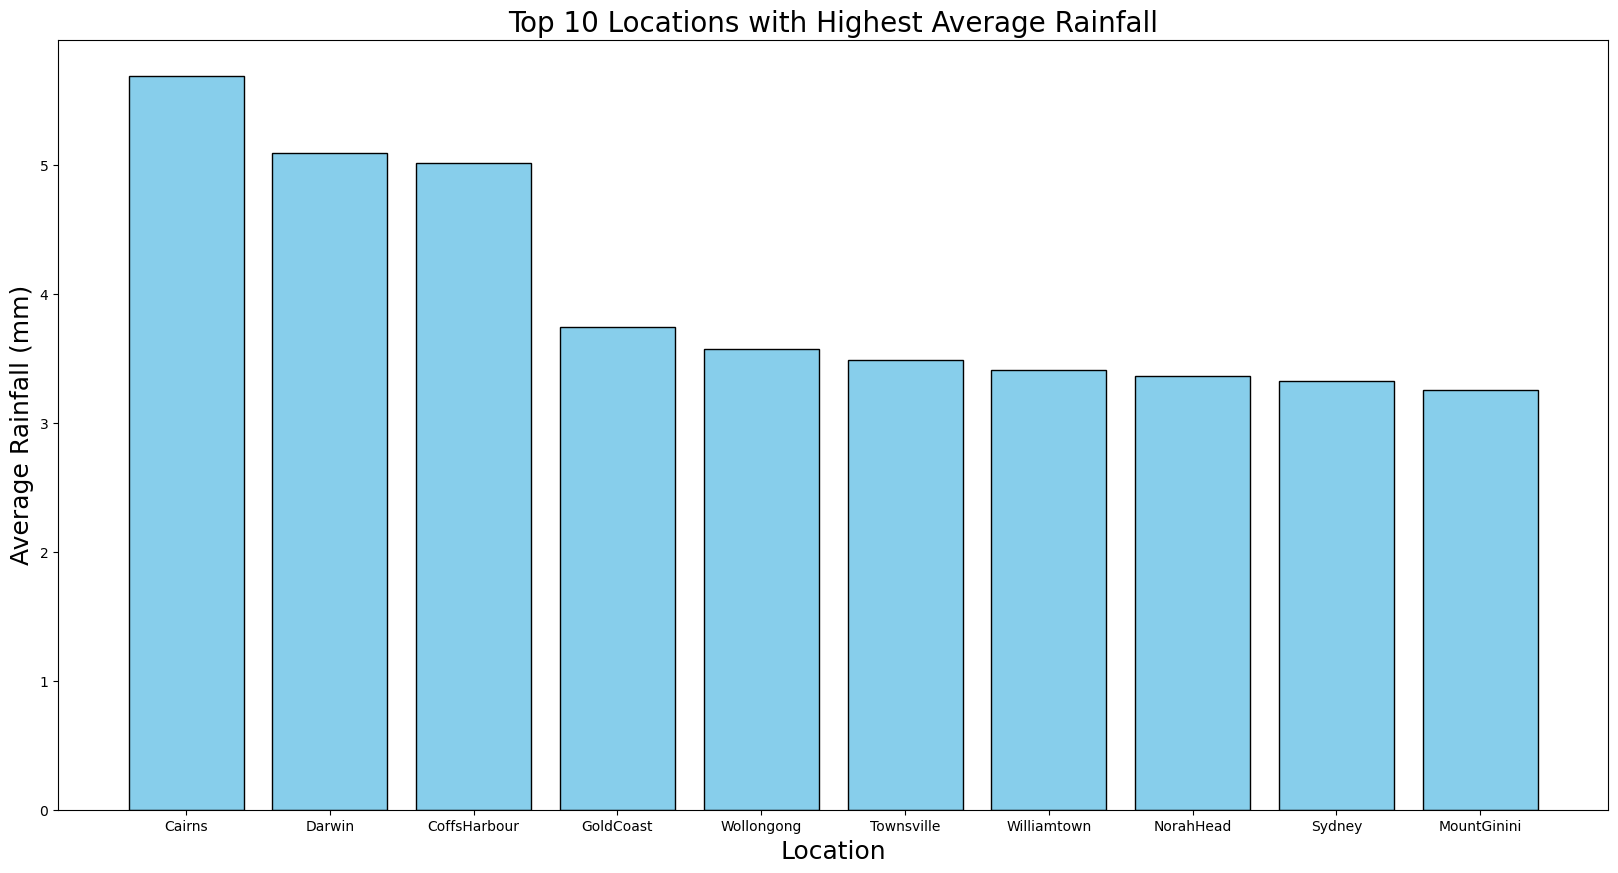

In [13]:
group = data.groupby('Location')
grouped = group[['Rainfall']].mean().sort_values(by='Rainfall', ascending=False)

getdata = pd.DataFrame(grouped).reset_index()
x = getdata['Location'].head(10)
y = getdata['Rainfall'].head(10)
plt.figure(figsize=(20,10))
plt.bar(x, y, color='skyblue', edgecolor='black')
plt.xlabel('Location', fontsize=18)
plt.ylabel('Average Rainfall (mm)', fontsize=18)
plt.title("Top 10 Locations with Highest Average Rainfall", fontsize=20)
plt.show()


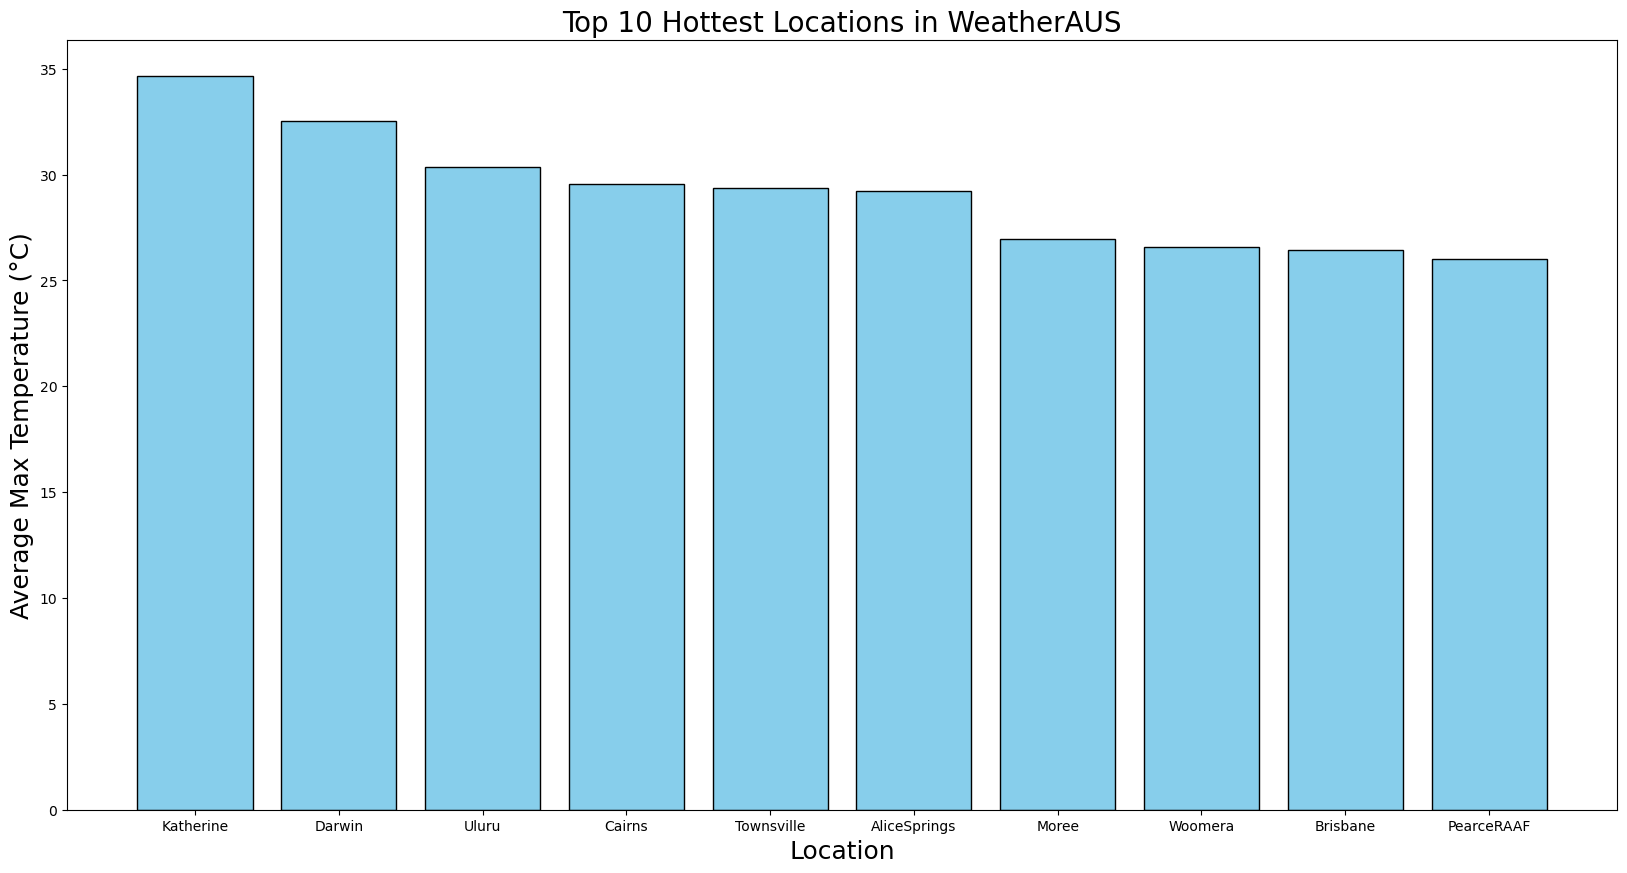

In [14]:

group = data.groupby('Location')
grouped = group[['MaxTemp']].mean().sort_values(by='MaxTemp', ascending=False)

getdata = pd.DataFrame(grouped).reset_index()

x = getdata['Location'].head(10)
y = getdata['MaxTemp'].head(10)

plt.figure(figsize=(20,10))
plt.bar(x, y, color='skyblue', edgecolor='black')
plt.xlabel('Location',fontsize=18)
plt.ylabel('Average Max Temperature (°C)',fontsize=18)
plt.title("Top 10 Hottest Locations in WeatherAUS",fontsize=20)
plt.show()


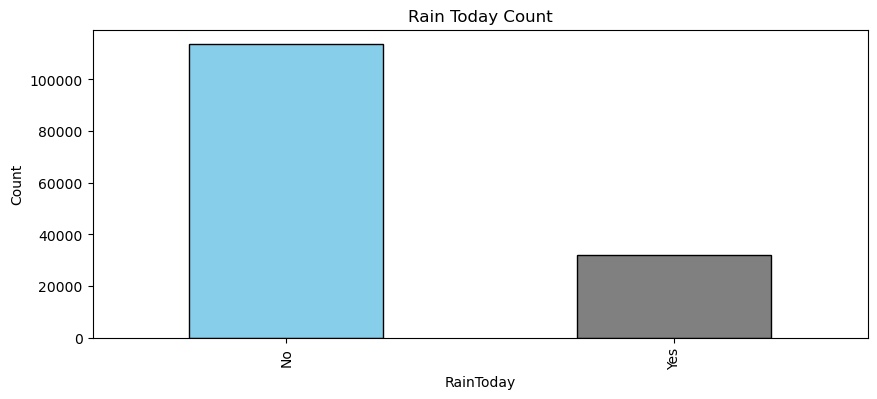

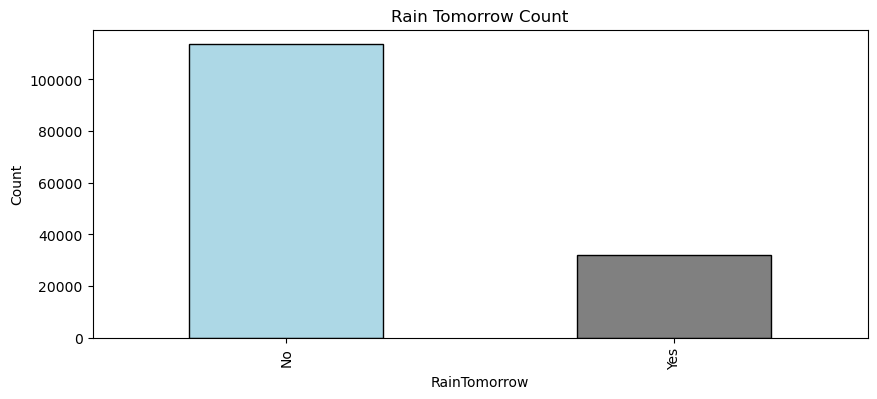

In [15]:

plt.figure(figsize=(10,4))
data['RainToday'].value_counts().plot(kind='bar', color=['skyblue','gray'], edgecolor='black')
plt.title('Rain Today Count')
plt.xlabel('RainToday')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10,4))
data['RainTomorrow'].value_counts().plot(kind='bar', color=['lightblue','gray'], edgecolor='black')
plt.title('Rain Tomorrow Count')
plt.xlabel('RainTomorrow')
plt.ylabel('Count')
plt.show()



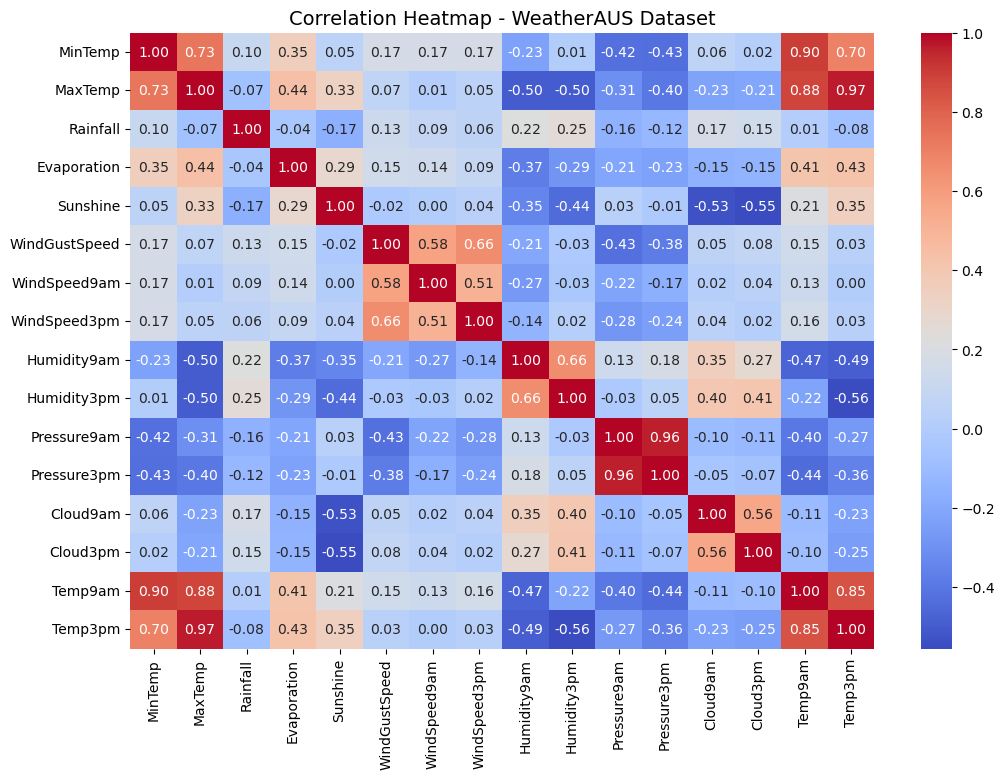

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(data.select_dtypes(['number']).corr(), annot=True,cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap - WeatherAUS Dataset", fontsize=14)
plt.show()

#+(blue)-->strong +ve relation (both increase together)
#-1(red)-->-ve relation (one increase and other decreases)
#0(white)-->no relation

In [17]:
data=data.drop(['Date'],axis=1,errors='ignore')

le=LabelEncoder()
le1=LabelEncoder()
le2=LabelEncoder()
le3=LabelEncoder()
le4=LabelEncoder()
le5=LabelEncoder()
data['RainToday']=le.fit_transform(data['RainToday'])
data['RainTomorrow']=le1.fit_transform(data['RainTomorrow'])
data['WindGustDir']=le2.fit_transform(data['WindGustDir'])
data['WindDir9am']=le3.fit_transform(data['WindDir9am'])
data['WindDir3pm']=le4.fit_transform(data['WindDir3pm'])
data['Location']=le5.fit_transform(data['Location'])
data


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,10.8,21.2,0.0,1.80,6.60,1,22.0,1,7,...,66.0,48.0,1028.4,1024.7,4.45,4.51,15.7,21.0,0,0
1,0,3.7,19.0,0.0,1.40,7.61,3,24.0,3,5,...,75.0,32.0,1024.2,1021.1,4.45,4.51,9.6,18.5,0,0
2,0,9.6,15.8,0.0,2.60,7.61,4,52.0,5,4,...,35.0,51.0,1017.9,1011.5,4.45,4.51,14.7,15.4,0,1
3,0,10.1,15.5,16.6,0.80,7.61,5,50.0,7,7,...,96.0,80.0,1007.4,1008.0,4.45,4.51,11.2,14.0,1,1
4,0,11.2,16.2,1.8,0.60,7.61,7,30.0,14,14,...,89.0,70.0,1018.4,1019.2,4.45,4.51,13.0,15.3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,48,16.8,31.9,0.0,27.00,7.61,10,44.0,9,8,...,51.0,17.0,1017.3,1014.2,0.00,4.51,20.2,29.5,0,0
145456,48,17.0,33.5,0.0,12.40,12.70,10,43.0,2,2,...,38.0,12.0,1015.2,1011.8,0.00,0.00,22.2,32.0,0,0
145457,48,18.9,38.8,0.0,12.00,12.40,3,41.0,1,6,...,10.0,5.0,1012.0,1008.7,0.00,0.00,27.6,37.9,0,0
145458,48,23.5,38.3,0.0,18.20,13.00,10,50.0,10,0,...,54.0,22.0,1013.2,1011.3,1.00,1.00,25.1,35.4,0,0


In [19]:
x=data.drop('RainTomorrow',axis=1)
y=data['RainTomorrow']

scaler = StandardScaler()
x_scaled=scaler.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [20]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [21]:
y_pred=model.predict(x_test)

accuracy=accuracy_score(y_test,y_pred)
print("Logistic Regression Accuracy:",accuracy)

# Classification Report
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Logistic Regression Accuracy: 0.845077684586828

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     22792
           1       0.71      0.48      0.57      6300

    accuracy                           0.85     29092
   macro avg       0.79      0.71      0.74     29092
weighted avg       0.83      0.85      0.83     29092

Confusion Matrix:
 [[21570  1222]
 [ 3285  3015]]


In [22]:
model2=RandomForestClassifier(n_estimators=100,random_state=42)
model2.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [23]:
y_pred=model2.predict(x_test)

accuracy=accuracy_score(y_test,y_pred)
print("RandomForestClassifier:",accuracy)

# Classification Report
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

RandomForestClassifier: 0.8576240890966589

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     22792
           1       0.76      0.51      0.61      6300

    accuracy                           0.86     29092
   macro avg       0.82      0.73      0.76     29092
weighted avg       0.85      0.86      0.85     29092

Confusion Matrix:
 [[21766  1026]
 [ 3116  3184]]


In [24]:

xgb=XGBClassifier(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=42)
xgb.fit(x_train,y_train)

# accuracy
accuracy=accuracy_score(y_test,y_pred)
print("XGBoost Accuracy:",accuracy)

# Classification Report
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

XGBoost Accuracy: 0.8576240890966589

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     22792
           1       0.76      0.51      0.61      6300

    accuracy                           0.86     29092
   macro avg       0.82      0.73      0.76     29092
weighted avg       0.85      0.86      0.85     29092

Confusion Matrix:
 [[21766  1026]
 [ 3116  3184]]


In [25]:

train_pred_lr = model.predict(x_train)
ytest_pred_lr = model.predict(x_test)

ytrain_pred_rf = model2.predict(x_train)
ytest_pred_rf = model2.predict(x_test)

ytrain_pred_xgb = xgb.predict(x_train)
ytest_pred_xgb = xgb.predict(x_test)

# Accuracy calculation
lr_train = accuracy_score(y_train, train_pred_lr)
lr_test = accuracy_score(y_test, ytest_pred_lr)

rf_train = accuracy_score(y_train, ytrain_pred_rf)
rf_test = accuracy_score(y_test, ytest_pred_rf)

xgb_train = accuracy_score(y_train, ytrain_pred_xgb)
xgb_test = accuracy_score(y_test, ytest_pred_xgb)

# Combine results
score = pd.DataFrame({
    'Model': ['LogisticRegression', 'RandomForestClassifier', 'XGBoostClassifier'],
    'TrainingScore': [lr_train, rf_train, xgb_train],
    'TestingScore': [lr_test, rf_test, xgb_test]
})

score


,Model,TrainingScore,TestingScore
0,LogisticRegression,0.843393,0.845078
1,RandomForestClassifier,0.999940,0.857624
2,XGBoostClassifier,0.850414,0.850268


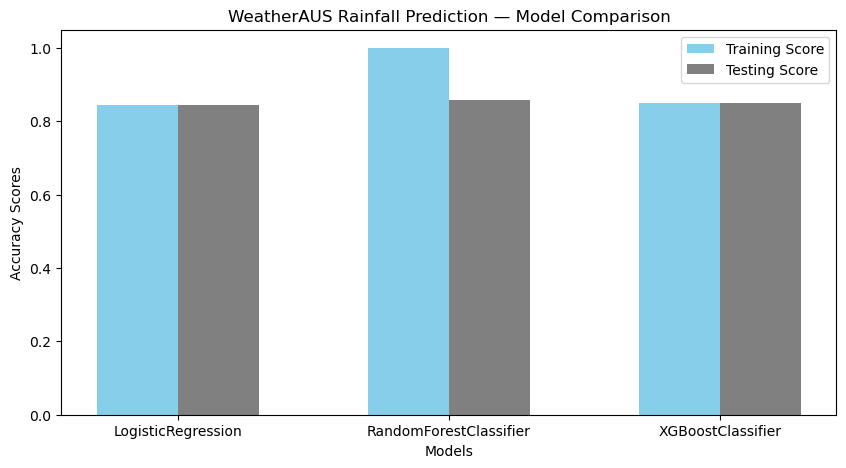

In [26]:
%matplotlib inline
x = score.Model
y = score.TrainingScore
z = score.TestingScore
width = 0.3
x_indices = np.arange(len(x))
plt.figure(figsize=(10,5))
plt.bar(x_indices - width / 2, y, width=width, label='Training Score', color='skyblue')
plt.bar(x_indices + width / 2, z, width=width, label='Testing Score', color='gray')
plt.xticks(x_indices, x)
plt.xlabel('Models')
plt.ylabel('Accuracy Scores')
plt.title('WeatherAUS Rainfall Prediction — Model Comparison')
plt.legend()
plt.show()


In [26]:
def predict_rainfall(Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir, WindGustSpeed,
                     WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm,
                     Pressure9am, Pressure3pm, Temp9am, Temp3pm, RainToday, Cloud3pm, Cloud9am):
    try:
        # Encode categorical values using saved label encoders
        loc = le5.transform([Location])[0]
        gust_dir = le2.transform([WindGustDir])[0]
        wind9 = le3.transform([WindDir9am])[0]
        wind3 = le4.transform([WindDir3pm])[0]
        rain_today = le.transform([RainToday])[0]

        # Create input list (match model feature order)
        input_data = [[loc, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, gust_dir, WindGustSpeed,
                       wind9, wind3, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm,
                       Pressure9am, Pressure3pm, Temp9am, Temp3pm, rain_today, Cloud3pm, Cloud9am]]

        # Predict
        prediction = model.predict(input_data)[0]
        result = "🌧️ Rain Tomorrow" if prediction == 1 else "☀️ No Rain Tomorrow"
        return result
    except Exception as e:
        return f"Error: {str(e)}"

# 🔟 Gradio Interface
iface = gr.Interface(
    fn=predict_rainfall,
    inputs=[
        gr.Textbox(label="Location"),
        gr.Number(label="MinTemp"),
        gr.Number(label="MaxTemp"),
        gr.Number(label="Rainfall"),
        gr.Number(label="Evaporation"),
        gr.Number(label="Sunshine"),
        gr.Textbox(label="WindGustDir"),
        gr.Number(label="WindGustSpeed"),
        gr.Textbox(label="WindDir9am"),
        gr.Textbox(label="WindDir3pm"),
        gr.Number(label="WindSpeed9am"),
        gr.Number(label="WindSpeed3pm"),
        gr.Number(label="Humidity9am"),
        gr.Number(label="Humidity3pm"),
        gr.Number(label="Pressure9am"),
        gr.Number(label="Pressure3pm"),
        gr.Number(label="Temp9am"),
        gr.Number(label="Temp3pm"),
        gr.Textbox(label="RainToday (Yes/No)"),
        gr.Number(label="Cloud3pm"),
        gr.Number(label="Cloud9am")
    ],
    outputs=gr.Textbox(label="Prediction Result"),
    title="🌦️ WeatherAUS Rainfall Prediction (Full Features)",
    description="Enter weather details (including wind, humidity, pressure, etc.) to predict if it will rain tomorrow."
)


iface.launch(share=True)

# "Sydney", 15.0, 25.0, 2.0, 5.5, 8.0,
#             "N", 35, "N", "NW", 11, 22, 65, 55,
#             1015, 1012, 20, 25, "No", 5, 3

# "Melbourne", 10.0, 20.0, 5.0, 4.0, 6.0,
#             "SW", 45, "SW", "S", 20, 25, 80, 70,
#             1008, 1005, 18, 22, "Yes", 7, 6

* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://188186397250e9baa4.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
